!pip install git+https://github.com/CC-RMD-EpiBio/autoencirt.git

In [1]:
%pylab inline
import numpy as np
import sys
sys.path.append('../bayesianquilts')

import matplotlib.pyplot as plt


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
!pwd

/Users/changjc/workspace/autoencirt


In [3]:
import tensorflow as tf
import autoencirt
from autoencirt.irt import GRModel
from autoencirt.data.rwa import item_text, get_data

In [4]:
tfdata, num_people = get_data(reorient=True)
item_names = [f"Q{j}" for j in range(1, 23)]
grm = GRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=2,
    eta_scale=1e-6,
    kappa_scale=1e-6,
    weight_exponent=1,
    response_cardinality=10
)

batch_size = 121

def data_factory_factory(batch_size=batch_size, repeat=False, shuffle=False):
    def data_factory(batch_size=batch_size):
        if shuffle:
            out = tfdata.shuffle(batch_size*10)
        else:
            out = tfdata
        
        if repeat:
            out = out.repeat()
        return out.batch(batch_size)
    return data_factory

In [5]:
num_people/batch_size

81.66115702479338

In [6]:
losses = grm.fit(
            data_factory_factory(shuffle=False, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=3000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0015)

Running optimization for 3000 steps of 1 accumulated batches, checking every 81 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/2e57efb0-23f0-4fac-a648-38da9df6a480/2e57efb0-23f0-4fac-a648-38da9df6a480-1


  3%|▎         | 79/3000 [00:09<04:27, 10.91it/s] 

Step 81: average-batch loss:165329294663.98114 rel loss: 6.0485348469696295e+296
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/2e57efb0-23f0-4fac-a648-38da9df6a480/2e57efb0-23f0-4fac-a648-38da9df6a480-2


  5%|▌         | 153/3000 [00:16<04:26, 10.67it/s]

In [ ]:
losses = grm.fit(
            data_factory_factory(shuffle=False, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=3000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0005)

In [ ]:
discrim = grm.sample(100)['discriminations']
discrim.shape

TensorShape([100, 1, 2, 22, 1])

In [ ]:
discrim_mean = np.mean(discrim, axis=0)

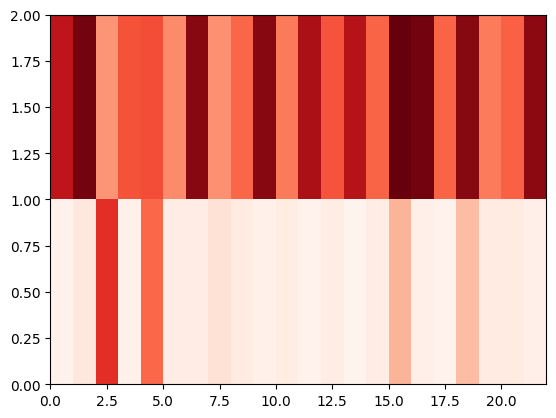

In [ ]:
plt.pcolormesh(discrim_mean[0, ..., 0], vmin=0, cmap='Reds')